# Knowledge and Data: Practical Assignment 2
## Manipulate local and external RDF Knowledge Graphs 

YOUR NAME: Sebastião Manuel Inácio Rosalino

YOUR VUNetID: sxx209 

*(If you do not provide your name and VUNetID we will not accept your submission).*

### Learning objectives

At the end of this exercise you should be able to perform some simple manipulations of RDF Data using the rdflib library. You should be able to: 

1. Add and retrieve information from a local RDF database
2. Represent RDF data in other formats, such as the .dot format for graph visualisation
3. Retrieve information from an RDF database created from Web Data
4. Query information from the Web with SPARQL

### Practicalities

Follow this Notebook step-by-step. 

Of course, you can do the exercises in any Programming Editor of your liking. 
But you do not have to. Feel free to simply write code in the Notebook. When 
everything is filled in and works, save the Notebook and submit it 
as a Jupyter Notebook, i.e. with an .ipynb extension. Please use as name of the 
Notebook your studentID+Assignment2.ipynb.  

Other than in courses dedicated to programming we will not evaluate the style
of the programs. But we will test your programs on other data than we provide, 
and your program should give the correct answers to those test-data as well. 

# A. Tasks related to local RDF Knowledge Graphs

This first cell will open a file 'example-from-slide.ttl' using the rdflib library. The first Practical Assignment should have taught you that manipulating symbols as strings is a major pain. 

Programming libraries, such as **rdflib**, help you with this mess once and for all, by parsing the files, creating appropriate datastructures (Graph()) and providing useful functions (such as serialize(), save() and much more). 
Check the website of rdflib http://rdflib.readthedocs.io/: this library does most of the hard work for you.

In [26]:
# Before starting with the tasks of this assignment, do not forget to install **rdflib** so we can start using it. 
%pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [27]:
from rdflib import Graph, RDF, Namespace, Literal, URIRef

g = Graph()

EX = Namespace('http://example.com/kad0/')
g.bind('ex',EX)

def serialize_graph():
    # g.serialize() returns a string
    print(g.serialize(format='turtle'))

def save_graph(filename):
    with open(filename, 'w') as f:
        g.serialize(f, format='nt')
        
def load_graph(filename):
    with open(filename, 'r') as f:
        g.parse(f, format='turtle')   

The file 'example-from-slides.ttl' formalises the knowledge base from the slides from Module 1, and a bit more. 

Here is how it looks when you load it into your program and serialise it with rdflib in turtle. 

In [28]:
load_graph('example-from-slides.ttl')
serialize_graph()

@prefix ex1: <http://example.com/kad/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex1:Germany a ex1:EuropeanCountry .

ex1:Netherlands a ex1:Country ;
    ex1:hasCapital ex1:Amsterdam ;
    ex1:hasName "The Netherlands" ;
    ex1:neighbours ex1:Belgium .

ex1:hasCapital rdfs:range ex1:Capital ;
    rdfs:subPropertyOf ex1:containsCity .

ex1:Amsterdam a ex1:Capital .

ex1:Belgium a ex1:Country .

ex1:EuropeanCountry rdfs:subClassOf ex1:Country .

ex1:containsCity rdfs:domain ex1:Country ;
    rdfs:range ex1:City .

ex1:Capital rdfs:subClassOf ex1:City .




Now, we can manipulate the graph very easily, e.g. like in the following very simple function, which returns the predicate(s) that relate a subject to a literal object: 

In [29]:
for s,p,o in g:
    if type(o) is Literal:
        print(p)

http://example.com/kad/hasName


### - Task 1: (1 Point) Add information to an RDF graph

Add triples to the knowledge graph. Make sure that they have the right namespaces. 

Similarily to the triples already present in the file 'example-from-slides.ttl':
- add at least three new countries with their name and capital 
- add at least one triple with the neighbour predicate

Check: http://rdflib.readthedocs.io/en/stable/intro_to_creating_rdf.html

Remember that ```a``` is Turtle shorthand for ```rdf:type```.

In [30]:
ex = Namespace("http://example.com/kad/")
owl = Namespace("http://www.w3.org/2002/07/owl#")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")


# add triples here to the graph 'g' (do not forget the namespaces).

# Adding all of the Portugal information

g.add((ex.Portugal, rdf.type, ex.Country))
g.add((ex.Portugal, ex.hasName, Literal("República Portuguesa")))
g.add((ex.Portugal, ex.hasCapital, ex.Lisbon))

# Adding all of the USA information

g.add((ex.USA, rdf.type, ex.Country))
g.add((ex.USA, ex.hasName, Literal("United States of America")))
g.add((ex.USA, ex.hasCapital, ex.WashingtonDC))

# Adding all of the Spain information

g.add((ex.Spain, rdf.type, ex.Country))
g.add((ex.Spain, ex.hasName, Literal("Reino de España")))
g.add((ex.Spain, ex.hasCapital, ex.Madrid))

# Neighbour predicate triple

g.add((ex.Portugal, ex.neighbours, ex.Spain))

serialize_graph()

@prefix ex1: <http://example.com/kad/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex1:Germany a ex1:EuropeanCountry .

ex1:Netherlands a ex1:Country ;
    ex1:hasCapital ex1:Amsterdam ;
    ex1:hasName "The Netherlands" ;
    ex1:neighbours ex1:Belgium .

ex1:Portugal a ex1:Country ;
    ex1:hasCapital ex1:Lisbon ;
    ex1:hasName "República Portuguesa" ;
    ex1:neighbours ex1:Spain .

ex1:USA a ex1:Country ;
    ex1:hasCapital ex1:WashingtonDC ;
    ex1:hasName "United States of America" .

ex1:hasCapital rdfs:range ex1:Capital ;
    rdfs:subPropertyOf ex1:containsCity .

ex1:Amsterdam a ex1:Capital .

ex1:Belgium a ex1:Country .

ex1:EuropeanCountry rdfs:subClassOf ex1:Country .

ex1:Spain a ex1:Country ;
    ex1:hasCapital ex1:Madrid ;
    ex1:hasName "Reino de España" .

ex1:containsCity rdfs:domain ex1:Country ;
    rdfs:range ex1:City .

ex1:Capital rdfs:subClassOf ex1:City .




*After you ran the previous code (adding triples) the next cells will be executed on your extended graph. That is ok.*

### - Task 2a: (1 Point) Get structured information from an RDF graph (all Literals)

Use the functions available in the RDFLib library. Write a small function to print all Literals. 

Hint: there is a function in rdflib to test the type of an object (check previous examples in this notebook)

In [31]:
for s,p,o in g:
    if isinstance(o, Literal):
        print(o)

United States of America
The Netherlands
República Portuguesa
Reino de España


### - Task 2b: (1 Point) Get structured information from an RDF graph (all unique Predicates)

Please provide another function that gives a **unique** list of the predicates, ordered by occurrence (most occurring first). The answer will look like similar to this: 
<br>http://www.w3.org/2000/01/rdf-schema#label
<br>http://www.w3.org/1999/02/22-rdf-syntax-ns#type
<br>http://example.com/sw2016/locatedIn
<br>http://www.w3.org/2000/01/rdf-schema#range

In [32]:
unique_predicates = {}

for s,p,o in g:
    if not str(p) in unique_predicates:
        unique_predicates[str(p)] = 0
    unique_predicates[str(p)] += 1

sorted_list = sorted(unique_predicates, reverse=True)

sorted_list

['http://www.w3.org/2000/01/rdf-schema#subPropertyOf',
 'http://www.w3.org/2000/01/rdf-schema#subClassOf',
 'http://www.w3.org/2000/01/rdf-schema#range',
 'http://www.w3.org/2000/01/rdf-schema#domain',
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type',
 'http://example.com/kad/neighbours',
 'http://example.com/kad/hasName',
 'http://example.com/kad/hasCapital']

# B. Tasks related to Graph visualisations 

### - Task 3a: (2 Point) From RDF to .dot 


In the lecture, we have seen two ways of writing a knowledge graph (simple n-triples, and simple turtle). Let us consider a 3rd syntax, this time a syntax that is useful for visualisation. One standard for visualising graphs is the .dot format.

Print the knowledge graph in .dot file format. Check https://graphviz.gitlab.io/documentation/ and https://graphviz.readthedocs.io/en/stable/ for the documentation. You will only need very little of this information, and the most relevant information can be found in the examples that are given. 

<br>Basically, an RDF graph in .dot format starts with 
<br>digraph G { 
    and then a list of links of the following form 
<br>s -> o [label="p"]
    for every (s p o ) in KG (separated by ;
<br>Do not forget to end with a closing bracket. }

An example is 
     
     digraph G { s1 -> o1 [label="p1"] ; s2 -> o2 [label="p2"] } 
     
for an RDF graph {(s1 p1 o1),(s2 p2 o2)}

In [33]:
# install and import the graphviz library
%pip install graphviz
import graphviz

Note: you may need to restart the kernel to use updated packages.


First, create an auxiliary function which strips the namespaces from URIs. This is necessary to make the node names readable when visualizing the .dot graph.

In [34]:
def strip(e):

    if type(e) is Literal:
        return str(e)
    
    result = e.split("/")[-1]
    if "#" in result:
        result = result.split("#")[-1]
    return result

In [35]:
# Testing the strip function

strip('http://www.example.org/pizza')

'pizza'

Next, convert your graph to the .dot format

In [36]:
dot = graphviz.Digraph(strict=True, graph_attr={"dpi":"52"})  # adjust dpi to scale graph

for s,p,o in g:
    dot.edge(strip(s), strip(o), strip(p))

View the end result is .dot syntax and as a graph:

strict digraph {
	graph [dpi=52]
	Spain -> Country [label=type]
	USA -> "United States of America" [label=hasName]
	Netherlands -> "The Netherlands" [label=hasName]
	containsCity -> City [label=range]
	Netherlands -> Amsterdam [label=hasCapital]
	Netherlands -> Belgium [label=neighbours]
	containsCity -> Country [label=domain]
	hasCapital -> Capital [label=range]
	USA -> Country [label=type]
	Portugal -> Lisbon [label=hasCapital]
	Netherlands -> Country [label=type]
	Capital -> City [label=subClassOf]
	Portugal -> "República Portuguesa" [label=hasName]
	Portugal -> Spain [label=neighbours]
	EuropeanCountry -> Country [label=subClassOf]
	Germany -> EuropeanCountry [label=type]
	hasCapital -> containsCity [label=subPropertyOf]
	Belgium -> Country [label=type]
	Portugal -> Country [label=type]
	Amsterdam -> Capital [label=type]
	Spain -> "Reino de España" [label=hasName]
	Spain -> Madrid [label=hasCapital]
	USA -> WashingtonDC [label=hasCapital]
}



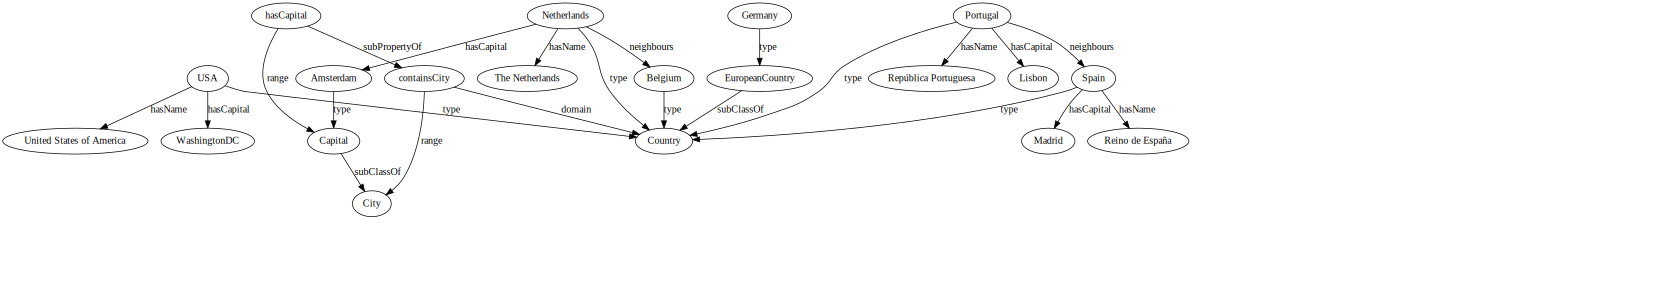

In [37]:
print(dot.source)
dot

### - Task 3b: (1 Point) From RDF to .dot with "semantic information"

There is a conceptual distinction between properties, instances and classes (sets of instances). A simple way of checking is the following

1. in a triple (s a o), with predicate a (which is a special abbreviation for the predicate rdf:type), the s is an Instance, and o is a Class. 
2. in a triple (s rdfs:subClassOf o) both s and o are Classes. 
3. in a triple (p rdfs:domain o) p is a Property and o is a Class. 
4. in a triple (p rdfs:range o)  p is a Property and o is a Class. 

Update the .dot representation for your RDF graph that distinguishes between types of links (RDF vocabulary vs others) and types of nodes (Classes versus Entities versus Literals) via different colors. Hint: you can use the 'color' attribute in the ```node``` and ```edge``` function.

Check how your graph looks once finished.

strict digraph {
	graph [dpi=52]
	Spain -> Country [label=type]
	USA -> "United States of America" [label=hasName]
	Netherlands -> "The Netherlands" [label=hasName]
	containsCity -> City [label=range]
	Netherlands -> Amsterdam [label=hasCapital]
	Netherlands -> Belgium [label=neighbours]
	containsCity -> Country [label=domain]
	hasCapital -> Capital [label=range]
	USA -> Country [label=type]
	Portugal -> Lisbon [label=hasCapital]
	Netherlands -> Country [label=type]
	Capital -> City [label=subClassOf]
	Portugal -> "República Portuguesa" [label=hasName]
	Portugal -> Spain [label=neighbours]
	EuropeanCountry -> Country [label=subClassOf]
	Germany -> EuropeanCountry [label=type]
	hasCapital -> containsCity [label=subPropertyOf]
	Belgium -> Country [label=type]
	Portugal -> Country [label=type]
	Amsterdam -> Capital [label=type]
	Spain -> "Reino de España" [label=hasName]
	Spain -> Madrid [label=hasCapital]
	USA -> WashingtonDC [label=hasCapital]
	Spain -> Country
	Spain -> Country [color=

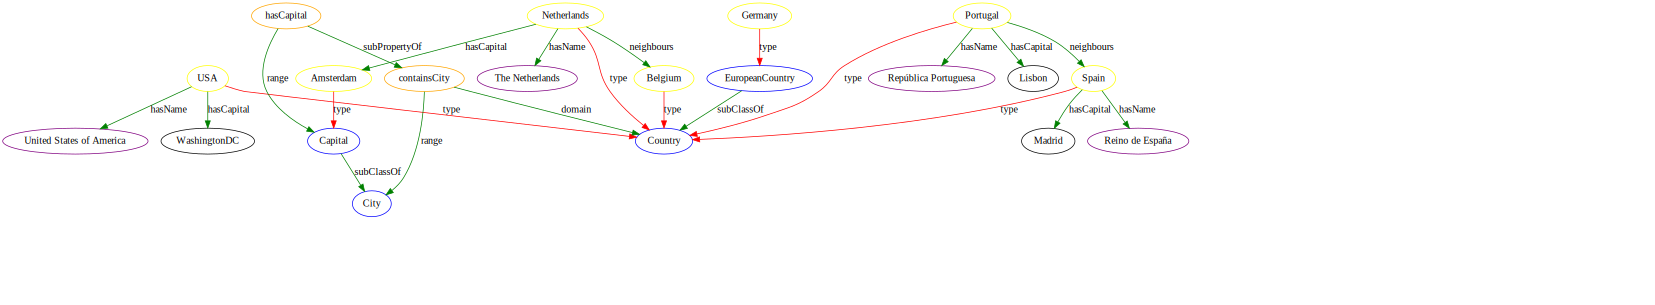

In [38]:
# Your code here

# The denomination chosen was: Blue for Classes; Orange for Properties, Yellow for Instances and Purple for Literals
# and the default color Black for Entities
# Red for RDF vocabulary and Green for Others

for s,p,o in g:
    
    dot.edge(strip(s), strip(o))
    
    if isinstance(o, Literal):
        dot.node(strip(o), color="purple")
        
    dot.edge(strip(s), strip(o), color="green")
    if "http://www.w3.org/1999/02/22-rdf-syntax-ns#" in p:
        dot.edge(strip(s), strip(o), color="red")
    
        if p == rdf.type:
            dot.node(strip(s), color="yellow")
            dot.node(strip(o), color="blue")
    
    if p == rdfs.subClassOf:
        dot.node(strip(s), color="blue")
        dot.node(strip(o), color="blue")
                 
    if p == rdfs.domain or p == rdfs.range:
        dot.node(strip(s), color="orange")
        dot.node(strip(o), color="blue")
        
print(dot.source)
dot

### - Task 4: (1 Point) Deriving implicit knowledge (a bit of schema)

We will look into Schema information in the latter modules, but let us try already to find some implicit information in a first bit of inferencing: whenever there are two statements (s a o) and (o rdfs:subClassOf o2) we can derive (and later prove) that (s a o2). 

Write a procedure that adds all implied triples to our knowledge graph. 

In [39]:
# Your code here

for s,p,o in g:
    
    if p == rdf.type:
        mother_class = g.value(o, rdfs.subClassOf)
        if mother_class is not None:
            g.add((s, rdf.type, mother_class))

In [40]:
# Checking the addition of the all the implied triples

serialize_graph()

@prefix ex1: <http://example.com/kad/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex1:Germany a ex1:Country,
        ex1:EuropeanCountry .

ex1:Netherlands a ex1:Country ;
    ex1:hasCapital ex1:Amsterdam ;
    ex1:hasName "The Netherlands" ;
    ex1:neighbours ex1:Belgium .

ex1:Portugal a ex1:Country ;
    ex1:hasCapital ex1:Lisbon ;
    ex1:hasName "República Portuguesa" ;
    ex1:neighbours ex1:Spain .

ex1:USA a ex1:Country ;
    ex1:hasCapital ex1:WashingtonDC ;
    ex1:hasName "United States of America" .

ex1:hasCapital rdfs:range ex1:Capital ;
    rdfs:subPropertyOf ex1:containsCity .

ex1:Amsterdam a ex1:Capital,
        ex1:City .

ex1:Belgium a ex1:Country .

ex1:EuropeanCountry rdfs:subClassOf ex1:Country .

ex1:Spain a ex1:Country ;
    ex1:hasCapital ex1:Madrid ;
    ex1:hasName "Reino de España" .

ex1:containsCity rdfs:domain ex1:Country ;
    rdfs:range ex1:City .

ex1:Capital rdfs:subClassOf ex1:City .




# C. Tasks related to local copies of external RDF Datasets using SPARQL

Until now, we have manipulated local knowledge graphs, but as we claimed in the lectures, the advantage of knowledge graphs is that they can easily be linked with other datasets on the Web. 

In the remaining 3 tasks, we will manipulate data from the Web, and ask complex queries over this web data. 

In the first task, we will access web data, make a local copy of it, and then query it. In the other two tasks, we will query live data directly from web Knowledge Graphs (in this case, the SPARQL endpoint of DBPedia). 

### - Task 5: (1 Point) Show and manipulate data about RDF resources on the Web 

With rdflib we can easily load a local graph, but we can just as well retrieve a graph from the Web. Here, we will do so using the *requests* library, which allows us to fire a request to any server and/or SPARQL endpoint and to capture the response. The following snippet does so for the resource Netherlands from Dbpedia, by using the 'DESCRIBE' keyword to give us all triples about The Netherlands, and then loads it in a RDFlib Graph object. Note that, in the next assignment, we will learn a more high-level approach that hides most of the raw request details.

In [41]:
# install the library
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [42]:
import requests

endpoint = "https://dbpedia.org/sparql"
query = 'DESCRIBE <http://dbpedia.org/resource/Netherlands>'

payload = {'query':query, 'format':'text/turtle'}
response = requests.post(endpoint, data = payload)

g = Graph()
g.parse(data=response.text, format='ttl')

<Graph identifier=N87c9acf2f5dc44fe86577b1be5eeba36 (<class 'rdflib.graph.Graph'>)>

Now do the same for Belgium

In [43]:
endpoint = "https://dbpedia.org/sparql"
query = 'DESCRIBE <http://dbpedia.org/resource/Belgium>'

payload = {'query':query, 'format':'text/turtle'}
response = requests.post(endpoint, data = payload)

g.parse(data=response.text, format='ttl')  # calling parse again merges the graphs

<Graph identifier=N87c9acf2f5dc44fe86577b1be5eeba36 (<class 'rdflib.graph.Graph'>)>

Let us start by showing diverse bits of information w.r.t  The Netherlands and Belgium in DBPedia. It is very similar to task 1, but now with Web Data. 

First, query the graph g (now containing the DBPedia information about both countries) and check which motor ways cross both countries.

In [44]:
qres = g.query(
   """
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT ?s
        WHERE {
            ?s dbo:county dbr:Netherlands .
            ?s dbo:county dbr:Belgium .
        }
        LIMIT 10
       """)
for row in qres:
    print("%s" % row)

http://dbpedia.org/resource/European_route_E19
http://dbpedia.org/resource/European_route_E25
http://dbpedia.org/resource/European_route_E314
http://dbpedia.org/resource/European_route_E34
http://dbpedia.org/resource/North_Sea–Baltic_Corridor


Write a query to check whether you can find someone who was born in The Netherlands and died in Belgium? You need to look at the data to know which property you should check for. 

To get an intuition of what is in the knowledge graph you might want to look at the human readable rendering on : http://dbpedia.org/resource/Netherlands

In [45]:
# Your code here

# BirthPlace and DeathPlace

qres = g.query(
   """
    PREFIX dbr: <http://dbpedia.org/resource/>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT ?p
        WHERE {
            ?p dbo:birthPlace dbr:Netherlands .
            ?p dbo:deathPlace dbr:Belgium .
        }
        LIMIT 10
       """)
for row in qres:
    print("%s" % row)

http://dbpedia.org/resource/Will_Hoebee
http://dbpedia.org/resource/Willem_Le_Jeune
http://dbpedia.org/resource/Salomon_Zeldenrust
http://dbpedia.org/resource/Cornelius_van_Zierikzee
http://dbpedia.org/resource/Dick_Nanninga
http://dbpedia.org/resource/Han_Grijzenhout
http://dbpedia.org/resource/Hein_Verbruggen
http://dbpedia.org/resource/Henri_Alexis_Brialmont
http://dbpedia.org/resource/Henriëtte_Ronner-Knip
http://dbpedia.org/resource/Gerard_Reve


### - Task 6: (2 Points) Ask SPARQL against live data using Yasgui

Yasgui (https://yasgui.triply.cc) is a nice graphical interface for asking queries.

Run a new query against http://dbpedia.org/sparql that does the following:

- Find all languages spoken in countries that are not official languages of that country
- The query should return two colums: the country, and the number of languages.
- Order the countries by the number of unofficial languages, from high to low.

In [46]:
'''
Add here the SPARQL query (not Python) code. (copy & paste from Yasgui)
When you run the query in Yasgui you should get an answer. 
'''

'''
PREFIX dbt: <http://dbpedia.org/resource/Template:>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT (?country as ?Country) (COUNT(DISTINCT(?all_languages)) as ?Number_Of_Unofficial_Spoken_Languages)
WHERE {
  ?country rdf:type dbo:Country.
  ?country dbo:language ?all_languages.
  FILTER NOT EXISTS {?country dbo:officialLanguage ?all_languages}.
}
GROUP BY ?country
ORDER BY DESC (?Number_Of_Unofficial_Spoken_Languages)
'''

'\nPREFIX dbt: <http://dbpedia.org/resource/Template:>\nPREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX dbr: <http://dbpedia.org/resource/>\nPREFIX dbo: <http://dbpedia.org/ontology/>\n\nSELECT (?country as ?Country) (COUNT(DISTINCT(?all_languages)) as ?Number_Of_Unofficial_Spoken_Languages)\nWHERE {\n  ?country rdf:type dbo:Country.\n  ?country dbo:language ?all_languages.\n  FILTER NOT EXISTS {?country dbo:officialLanguage ?all_languages}.\n}\nGROUP BY ?country\nORDER BY DESC (?Number_Of_Unofficial_Spoken_Languages)\n'